In this problem, you will write code to generate a mixture of 3 Gaussians satisfying the following requirements,
respectively. Please specify the mean vector and covariance matrix of each Gaussian in your answer.
1. 3 Points. Draw a data set where a mixture of 3 spherical Gaussians (where the covariance matrix is
the identity matrix times some positive scalar) can model the data well, but K-means cannot.
2. 4 Points. Draw a data set where a mixture of 3 diagonal Gaussians (where the covariance matrix can
have non-zero values on the diagonal, and zeros elsewhere) can model the data well, but K-means and a
mixture of spherical Gaussians cannot.
3. 5 Points. Draw a data set where a mixture of 3 Gaussians with unrestricted covariance matrices can
model the data well, but K-means and a mixture of diagonal Gaussians cannot.

In [1]:
import sklearn
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.datasets import make_blobs

# Problem 4

### Part 1

In [29]:
def plot_dist(dist, X, label=True, ax=None,title=''):
    #ax = ax or plt.gca()
    labels = dist.fit(X).predict(X)
    if label:
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, zorder=2)
    plt.axis('equal')
    plt.title(title)
    plt.autoscale(enable=True, axis='y')
    plt.autoscale(enable=True, axis='x')
    plt.show()

In [30]:
X1, _ = make_blobs(n_samples=100, centers=1, center_box = [(-3,0),(0,0)], cluster_std=0.2, random_state=0)
X1 = X1[:, ::-1]
X2, _ = make_blobs(n_samples=100, centers=1, center_box = [(-1,0),(1,0)], cluster_std=0.8, random_state=0)
X2 = X2[:, ::-1]
X3, _ = make_blobs(n_samples=100, centers=1, center_box = [(0,0),(2,0)],  cluster_std=0.2, random_state=0)
X3 = X3[:, ::-1]
X = np.array(X1.tolist() + X2.tolist() + X3.tolist())
X = X[:, ::-1]
gmm = GMM(covariance_type='spherical',n_components=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)

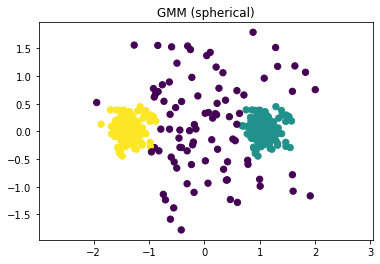

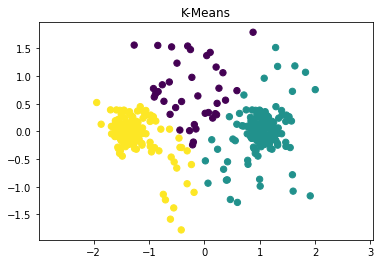

In [28]:
for d,t in [(gmm,'GMM (spherical)'),(kmeans, 'K-Means')]:
    plot_dist(d, X,title=t)

### Part 2

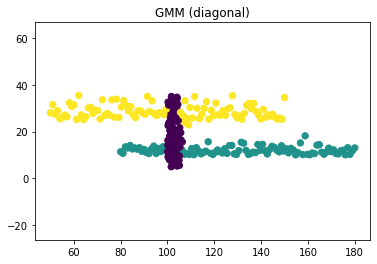

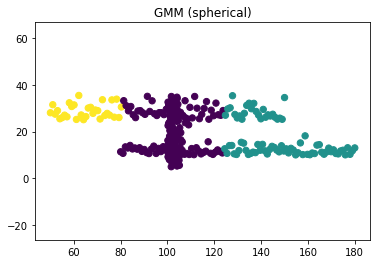

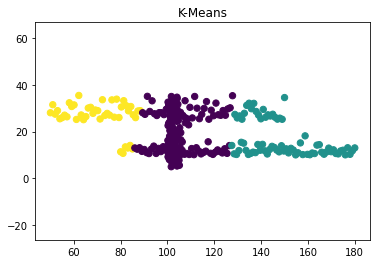

In [32]:
import random
def y_(x, m, b):
    return m*x + b
def last_y(x,m,b):
    return m*x[-1]+b

x1,x2,x3 = np.linspace(80,180,100), np.linspace(5,35,100), np.linspace(50,150,100)
y1 = [y_(x, 0, 10) + abs(random.gauss(2,2)) for x in x1]
y2 = [y_(x, 0,100) + abs(random.gauss(2,2)) for x in x2]
X2 = np.array([[x_,y_] for (x_,y_) in list(zip(x2,y2))])
X2 = X2[:, ::-1]
y3 = [y_(x, 0, 25) + abs(random.gauss(3,3)) for x in x3]
x,y = x1.tolist()+X2[:,0].tolist()+x3.tolist(),y1+X2[:,1].tolist()+y3
X = np.array([[x_,y_] for (x_,y_) in list(zip(x,y))])

gmm = GMM(covariance_type='diag',n_components=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
gmm_spher = GMM(covariance_type='spherical',n_components=3, random_state=42)

for d,t in [(gmm,'GMM (diagonal)'),(gmm_spher,'GMM (spherical)'),(kmeans, 'K-Means')]:
    plot_dist(d, X,title=t)

### Part 3

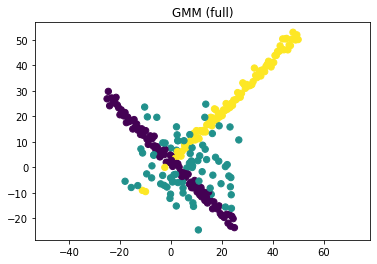

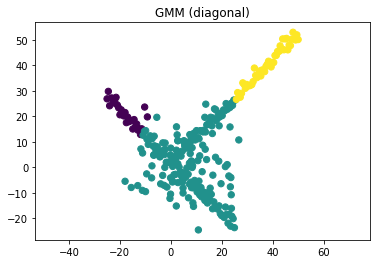

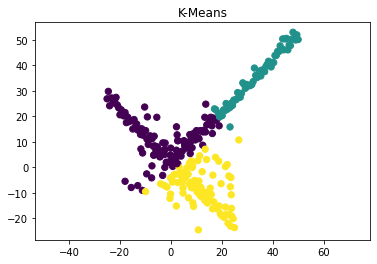

In [33]:
x1,x2,x3 = np.linspace(0,50,100), np.linspace(-25,25,100), np.linspace(30,130,100)
y1 = [y_(x, 1, 0) + abs(random.gauss(2,2)) for x in x1]
y2 = [y_(x, -1,0) + abs(random.gauss(2,2)) for x in x2]
X3, _ = make_blobs(n_samples=100, centers=1, cluster_std=10, random_state=0)
X3 = X3[:, ::-1]
x3, y3 = X3[:,0], X3[:,1].tolist()
x,y = x1.tolist()+x2.tolist()+x3.tolist(),y1+y2+y3
X = np.array([[x_,y_] for (x_,y_) in list(zip(x,y))])


gmm = GMM(covariance_type='full',n_components=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
gmm_diag = GMM(covariance_type='diag',n_components=3, random_state=42)
for d,t in [(gmm,'GMM (full)'),(gmm_diag,'GMM (diagonal)'),(kmeans, 'K-Means')]:
    plot_dist(d, X,title=t)